# FINAL PROJECT ARIA DATA SET PLANT NUTRITIONAL PREDICTION

### Name : Iqbal Janitra

### Batch : 003 

Link Deployment Huggingface : https://huggingface.co/spaces/Iqbaljanitra/Finalprojectariadataset

Link Tableau : https://public.tableau.com/app/profile/iqbal6468/viz/FINALPROJECTARIADATASET/Dashboard1?publish=yes

# IMPORT LIBRARIES

In [1107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.neighbors import KNeighborsRegressor
from sdv.tabular import GaussianCopula
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, r2_score
from phik import resources, report
from phik.report import plot_correlation_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import csv
import warnings
warnings.filterwarnings(action='ignore')


# PROBLEM STATEMENT

The problem statement is to develop a prediction model for `plant nutritional` data obtained from a test lab. The goal is to create a `model` that accurately predicts the nutrient levels of plants based on various input features, such as `v1, v2, v3, v4, v5, v6, v7, and v8`, which represent hidden variables related to soil quality, climate, and other environmental factors. `The model should be able to explore and analyze the dataset`, `cleanse and manipulate` the data as required, and use appropriate algorithms and methodologies to develop the prediction model. Additionally, the model should be evaluated and improved as necessary to ensure accuracy and reliability. The ultimate aim is to develop a tool that can be used to `optimize plant growth` and yield by providing insights into the `nutritional needs` of plants based on `these hidden features.`

# DATA LOADING

In [1106]:
df = pd.read_excel('dataset/aria_data.xlsx')

In [1083]:
df.shape

(160, 10)

In [1084]:
df.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


In [1085]:
df.tail()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
155,4.83,573.2500,361.250000,643.125000,489.812500,666.875,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.3750,398.125000,678.250000,541.125000,704.000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.0000,382.866667,657.466667,505.066667,719.200,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.3125,366.750000,642.937500,483.687500,675.625,359.062500,730.125000,3859.062500,lab 2
159,4.43,575.2000,350.266667,648.333333,495.400000,679.800,346.266667,718.733333,3903.333333,lab 2


In [1086]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


# DATA CLEANING

## Scale-Up Data

### CAUTION

`now i use manipulated data, this step changes the original data to fake data with changed the data volume or scale up data to 500` This approach can be useful for generating synthetic data that can be used for `testing and validating` prediction models without exposing `real data` to potential `privacy concerns`. However, it is important to note that the `synthetic data generated using this method may not capture all the nuances and complexities of the real data`, and should be used with `caution.`

The code above is an example of how to use the `GaussianCopula class` from the copulas library in Python to `generate synthetic data` based on a `multivariate Gaussian distribution.`

Here is a breakdown of the code:

1. `GaussianCopula()` - create a new `GaussianCopula` object to model the data.
2. `model.fit(df)` - fit the model to the original data df. This step estimates the parameters of the multivariate Gaussian distribution based on the empirical distribution of the input data.
3. `df = model.sample(500)` - `generate 500 new synthetic samples` from the fitted Gaussian distribution using the sample() method of the GaussianCopula object. The new samples will have the same dimensionality and marginal distributions as the original data, but the joint distribution will be modeled based on the fitted Gaussian distribution.
4. `df.to_csv('synthetic_data1.csv', index=False)` - save the new synthetic data to a CSV file named `synthetic_data1.csv`, without including the row index.

In [736]:
#create a GaussianCopula object with a dimension of 2
model = GaussianCopula()

#fit the model to your original data
model.fit(df)

# generate new samples
df = model.sample(500)

#save the synthetic data to a CSV file
df.to_csv('synthetic_data12.csv', index=False)

In [909]:
df.nunique()

target         500
v1             500
v2             500
v3             500
v4             500
v5             500
v6             500
v7             500
v8             500
sample_type      2
dtype: int64

In [1073]:
df

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.535422,403.413714,250.127634,484.195849,356.232461,448.176935,201.106119,537.812323,4002.042143,lab 2
1,4.545924,430.624469,255.479308,614.729298,393.143663,567.554734,232.024341,681.065681,4087.668929,lab 1
2,4.908784,288.772590,265.352161,482.119506,357.923501,420.674889,241.778579,504.809867,4245.634578,lab 1
3,4.592022,323.337432,255.768840,567.451833,347.661078,469.750459,247.606170,563.700550,4092.301440,lab 1
4,5.071755,322.092781,289.931072,469.933553,366.286832,480.229382,269.216169,576.275258,4638.897153,lab 1
...,...,...,...,...,...,...,...,...,...,...
495,4.589430,489.929433,276.907677,488.425065,404.577772,526.338130,213.742037,584.820145,4153.615153,lab 2
496,4.579692,472.371380,266.903674,541.036883,433.160238,472.360165,218.094281,524.844628,4003.555117,lab 2
497,4.780746,349.266008,289.452732,501.465107,386.935724,486.368360,238.570076,540.409289,4341.790983,lab 2
498,4.710649,396.557214,285.854424,585.416025,398.807060,504.375138,291.289756,560.416821,4287.816354,lab 2


the number of missing values (NaN) in each column of a Pandas DataFrame df. The isnull() method returns a Boolean mask of the same shape as the input DataFrame, The output shows that there are no missing values in any of the columns of the DataFrame. The 0 values indicate that there are zero missing values in each column. This is a good sign as missing values can affect the accuracy and reliability of the prediction model, and therefore it is important to handle them appropriately.

In [910]:
df.isnull().sum()

target         0
v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
sample_type    0
dtype: int64

 checks for duplicate rows in a Pandas DataFrame df and returns the count of unique and duplicated rows. the output of `df.duplicated().value_counts()` is False `160`, it means that there are `no duplicated` rows in the DataFrame.

In [911]:
df.duplicated().value_counts()

False    500
dtype: int64

This is the look the dataframe we have done manipulate

In [1017]:
df

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.535422,403.413714,250.127634,484.195849,356.232461,448.176935,201.106119,537.812323,4002.042143,lab 2
1,4.545924,430.624469,255.479308,614.729298,393.143663,567.554734,232.024341,681.065681,4087.668929,lab 1
2,4.908784,288.772590,265.352161,482.119506,357.923501,420.674889,241.778579,504.809867,4245.634578,lab 1
3,4.592022,323.337432,255.768840,567.451833,347.661078,469.750459,247.606170,563.700550,4092.301440,lab 1
4,5.071755,322.092781,289.931072,469.933553,366.286832,480.229382,269.216169,576.275258,4638.897153,lab 1
...,...,...,...,...,...,...,...,...,...,...
495,4.589430,489.929433,276.907677,488.425065,404.577772,526.338130,213.742037,584.820145,4153.615153,lab 2
496,4.579692,472.371380,266.903674,541.036883,433.160238,472.360165,218.094281,524.844628,4003.555117,lab 2
497,4.780746,349.266008,289.452732,501.465107,386.935724,486.368360,238.570076,540.409289,4341.790983,lab 2
498,4.710649,396.557214,285.854424,585.416025,398.807060,504.375138,291.289756,560.416821,4287.816354,lab 2


# EXPLORATORY DATA ANALYSIS

Exploratory data analysis (EDA) is a crucial step in data analysis, and can help you understand the patterns and relationships in my `manipulated data`, identify potential issues, and generate `hypotheses for further analysis`. These techniques can help me gain insights into `manipulated` data and identify potential issues or areas of interest for further analysis. Once you have a better understanding of your data, you can start developing and testing hypotheses, and building `predictive models to solve the problem.`



From the describe table, we can see that the dataset contains `500 observations and 9 features including the target variable`. The target variable has a mean value of 4.77 and a standard deviation of 0.17. The features have different ranges of values, with v8 having the highest mean value of 4411.94 and v2 having the lowest mean value of 304.23. The standard deviation of the features also varies, with v1 having the highest standard deviation of 75.34 and v4 having the lowest standard deviation of 32.25. Overall, the dataset seems to have a moderate amount of variation in its features, but more detailed analysis is needed to determine the significance of these statistics.

In [1074]:
df.describe()

,target,v1,v2,v3,v4,v5,v6,v7,v8
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.769699,398.423647,304.231689,526.171633,380.510566,508.399730,246.244035,578.571252,4411.940837
std,0.172590,75.342290,46.806594,63.362279,32.248489,66.573251,32.988419,84.097369,245.571149
min,4.516532,282.867707,230.882152,430.673530,332.237017,414.430241,201.106119,460.478045,3987.391312
25%,4.625948,334.707927,275.272726,472.570980,351.073648,452.344745,219.420314,508.713851,4199.135817
50%,4.747295,389.963123,294.332859,514.625672,377.398962,491.951828,239.795428,566.938556,4412.341246
75%,4.896547,451.189154,314.973761,573.224056,406.281216,559.259664,267.147198,632.845137,4622.737538
max,5.217046,584.075891,457.179206,657.867231,448.908826,662.758608,335.325933,890.339256,4822.515957


### Sample Type Data Distribution

Based on the pie chart we created using Seaborn, we can see that the majority of the data `54.6%` comes from lab 1, while the remaining `45.4%` comes from lab 2. This information is important to keep in mind when interpreting the results of our analysis, as there may be differences in the way that data is collected or measured between the two labs that could affect our predictions.

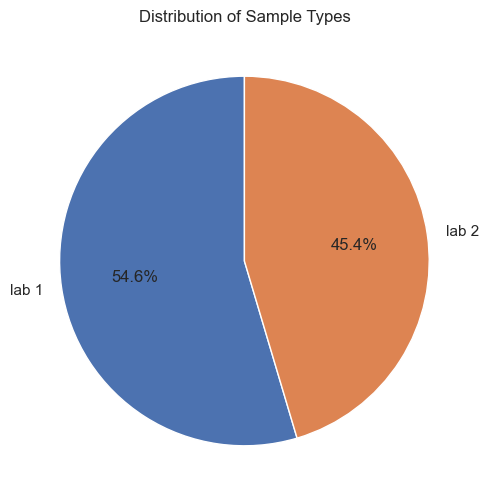

In [1076]:
sample_type_counts = df['sample_type'].value_counts()
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sample_type_counts, labels=sample_type_counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution of Sample Types')
plt.show()

This code generates a set of barplots showing the distribution of the sample_type variable for each of the eight features (v1 through v8) in the dataset. Based on the barplots generated by the code, it seems that for each of the eight features, the lab2 sample type has almost same distibution with the lab1 sample type.

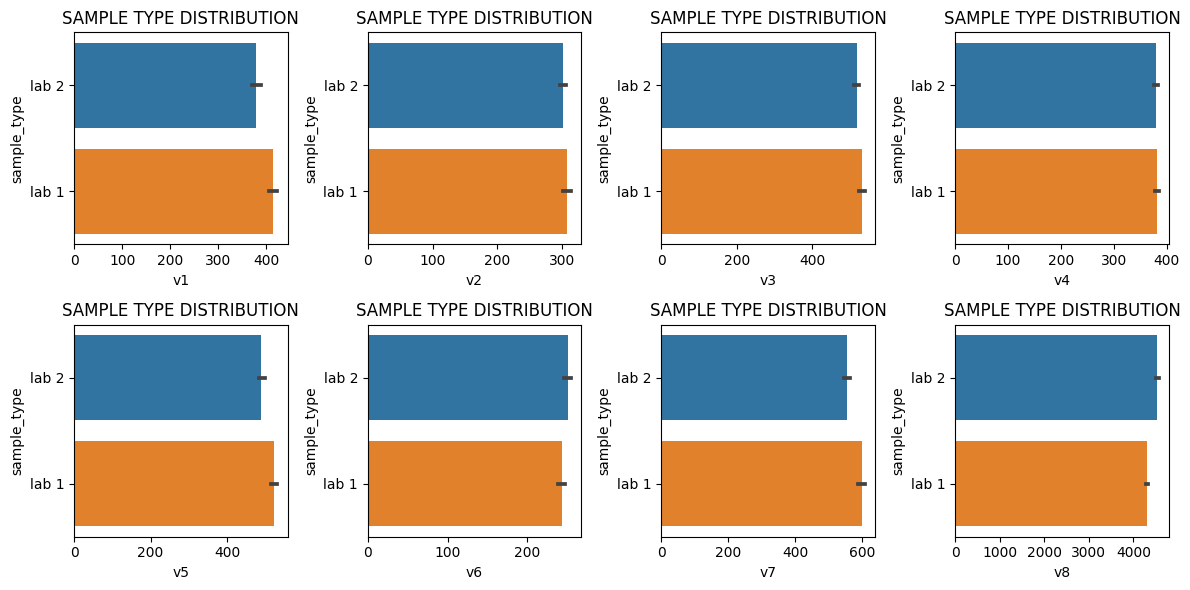

In [1018]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
axes = axes.flatten()

for i, col in enumerate(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']):
    sns.barplot(x=col, y="sample_type", data=df, ax=axes[i])
    axes[i].set_title("SAMPLE TYPE DISTRIBUTION")

plt.tight_layout()
plt.show()

### V1 - V8 Distribution

The code is generates a set of eight histograms, one for each of the numerical features in the dataset `v1 - v8`. The resulting plot will have `8 subplots`, one for each numerical feature, showing the distribution of the feature values. The skewness measure can provide information about the shape of the distribution and whether it is symmetric or skewed. If the skewness is close to 0, the distribution is approximately symmetric, while positive or negative skewness indicates a right or left-skewed distribution, respectively. the result on every data `v1-v8` is the majority of the data in v1 falls in the range of 300-400, while for v2 it falls in the range of 200-300. For v3, the majority of the data falls in the range of 400-500. Similarly, for v4 it falls in the range of 300-400, for v5 it falls in the range of 400-500, for v6 it falls in the range of 200-250, and for v7 it falls in the range of 200-250. For v8, the majority of the data falls in the range of 4000-4750.




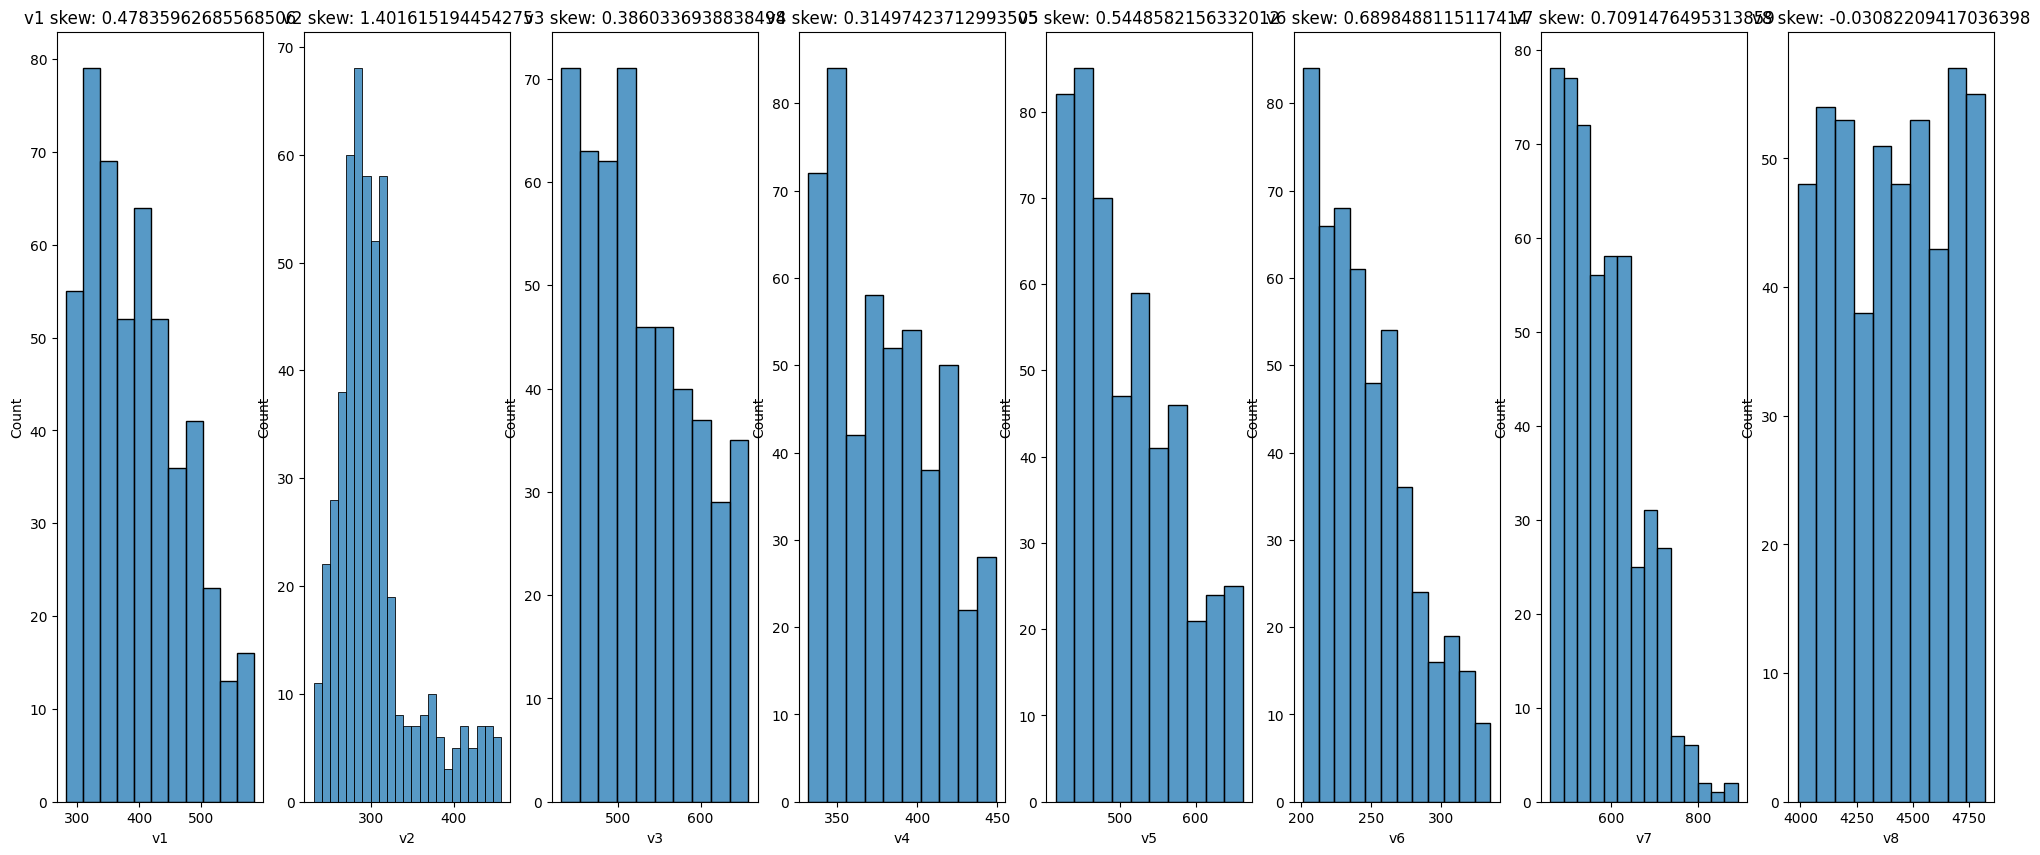

In [916]:
num = ['v1','v2','v3', 'v4', 'v5','v6','v7','v8']
fig, ax = plt.subplots(ncols=8, figsize=[25,10])
ax = ax.flatten()

for idx, col in enumerate(num):
    sns.histplot(df[col], ax=ax[idx])
    ax[idx].set_title(f'{num[idx]} skew: {df[col].skew()}')

`Correlation analysis:` Calculate the correlation coefficients between different pairs of features in the dataset to identify potential correlations and dependencies.

interval columns not set, guessing: ['target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']


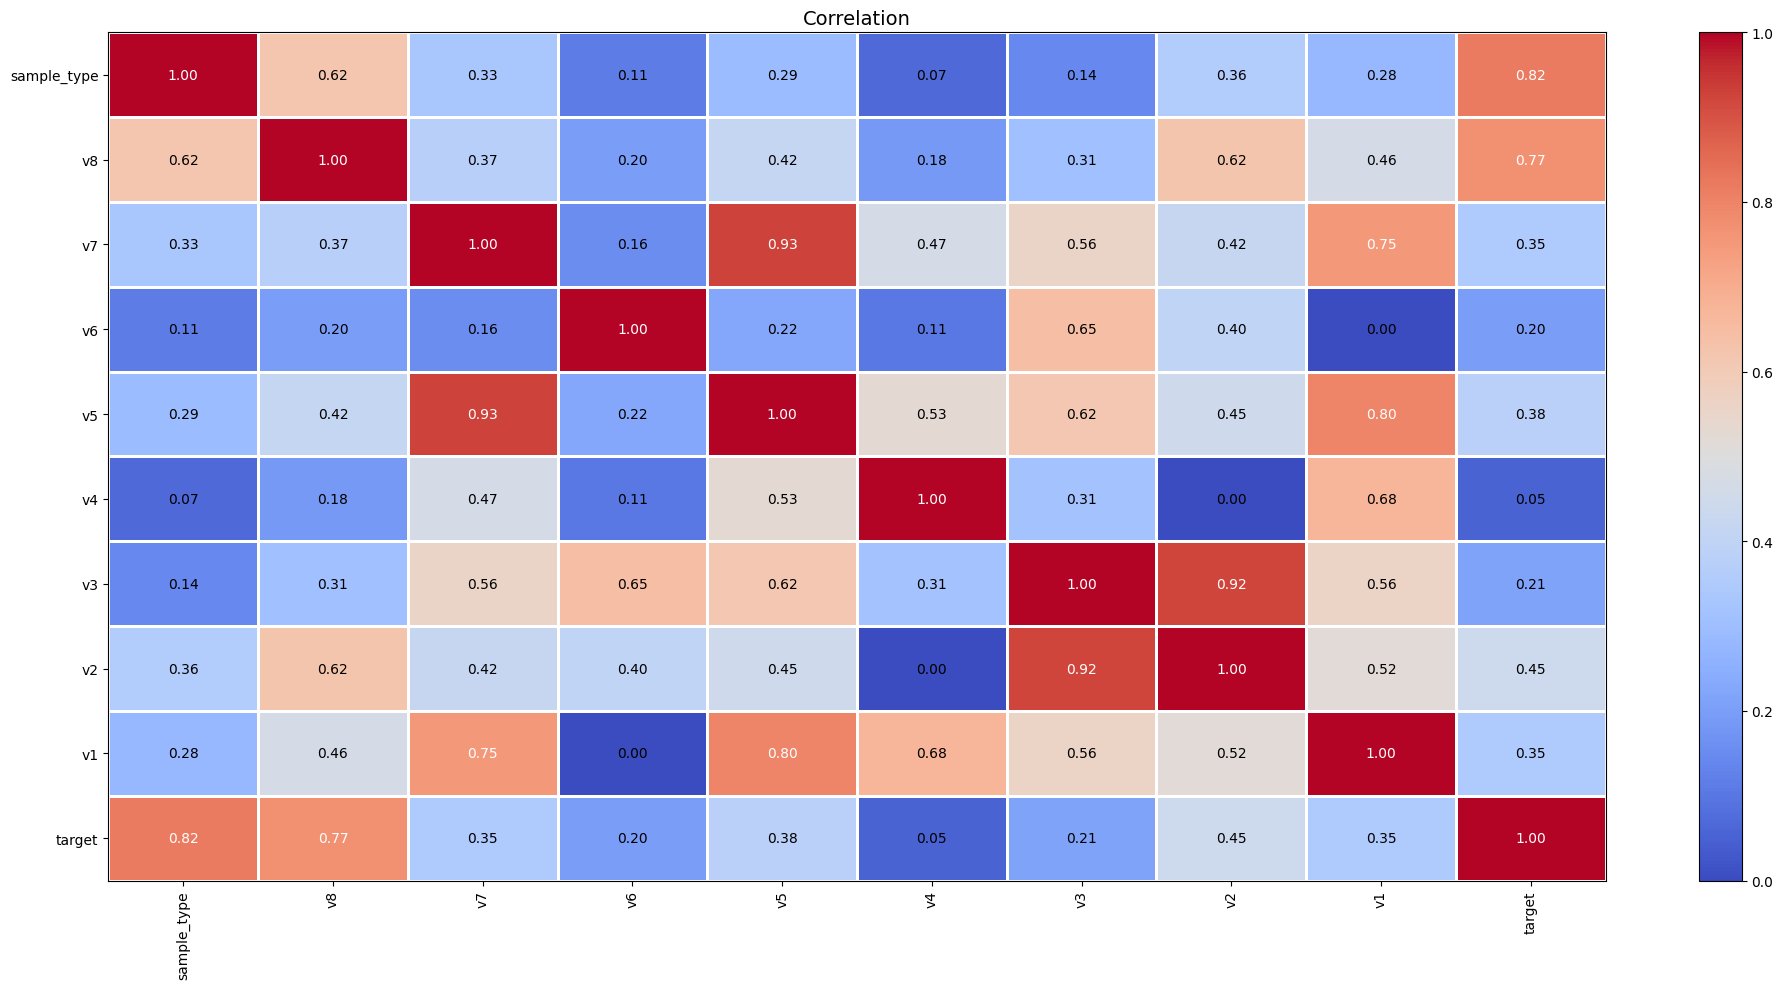

In [1019]:
phik_corr = df.phik_matrix()

plot_correlation_matrix(phik_corr.values, 
                        x_labels=phik_corr.columns, 
                        y_labels=phik_corr.index, 
                        vmin=0, vmax=1, color_map='coolwarm',
                        title=r'Correlation', 
                        figsize=(20,10))
plt.show()

The resulting output shows a table of `correlation coefficients` between the variables, with target as the row index and the other variables `v1 through v8, and sample_type` as the column names. The values range between -1 and 1, with larger absolute values indicating stronger correlations. Positive values indicate a positive correlation (as one variable increases, so does the other), while negative values indicate a negative correlation (as one variable increases, the other decreases).

Based on the phik correlation matrix, we can observe that the `sample_type` feature has the strongest positive correlation with the target variable, followed by `v8`. On the other hand, `v4` has the weakest correlation with the target variable. However, it's still important to carefully consider the nature of the data and the relationships between the variables, especially when interpreting the results.

`the data has been manipulated`, it's important to be cautious about the results of any analysis or modeling. It's possible that the manipulation has affected the relationships between the variables and the target in unexpected ways, and it may be necessary to `carefully evaluate the quality.`

In [1020]:
df.phik_matrix().target.sort_values(ascending=False) 

interval columns not set, guessing: ['target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']


target         1.000000
sample_type    0.817499
v8             0.772381
v2             0.445205
v5             0.381588
v7             0.351099
v1             0.348382
v3             0.214364
v6             0.197119
v4             0.053264
Name: target, dtype: float64

# FEATURES ENGINEERING

After we do `EDA` and find the correlation with `target` now we choosing of features for a machine learning model. The features are split into two categories: numerical features `numcol` and categorical features `catcol`. We want to choose as a feature for getting and make sure for an optimal model machine learning we make.

### Split between `X` (Features) and `Y` (Target), and split between Train-Set and Test-Set

splitting a data into training and test sets for a machine learning model. The data has a column `target`, which is being removed from the feature set (x) and stored as the target variable (y). The `train_test_split` function is then used to split the data into a training set `x_train, y_train` and a test set `x_test, y_test` and `test_size` represents the proportion of the dataset that you want to allocate to the test set. In this case, 0.2 means that 20% of the data will be used for testing, and 80% will be used for training.

In [1021]:
x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print('X Train Size : ', x_train.shape)
print('X Test Size  : ', x_test.shape)
print('')
print('Y Train Size : ', y_train.shape)
print('Y Test Size : ', y_test.shape)

X Train Size :  (400, 9)
X Test Size  :  (100, 9)

Y Train Size :  (400,)
Y Test Size :  (100,)


### Fature Selection (Features)

In [984]:
numcol = ['v1','v2','v3', 'v4', 'v5','v6','v7','v8']
catcol = ['sample_type']

creating separate DataFrames for the numerical and categorical features in the training set `X_train_num` and `X_train_cat` and the test set `X_test_num` and `X_test_cat` by indexing the original DataFrames `x_train` and `x_test`

In [985]:
X_train_num = x_train[numcol]
X_train_cat = x_train[catcol]

X_test_num = x_test[numcol]
X_test_cat = x_test[catcol]

combines all of the selected `numerical and categorical` features into a single DataFrame that can be used as input for a `machine learning model`. It is creating a dataframe with all the selected features `numerical and categorical` that can be used to train a model. Also, it is creating the `final` dataframe which is used for training the model.

In [954]:
X_train_full = pd.concat([X_train_num, X_train_cat], axis=1)
X_train_full

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
107,379.815002,412.258155,612.258155,402.801322,438.278963,321.771455,486.976626,4263.555728,lab 1
336,354.169669,305.452330,530.409335,371.271394,489.117255,231.462678,543.463617,4581.784956,lab 1
71,498.453891,347.244213,547.244213,400.260964,515.110111,222.260509,702.422879,4039.831683,lab 2
474,497.425217,280.309468,491.035008,402.018915,471.214689,202.973999,523.571877,4204.642018,lab 1
6,409.918641,280.026169,504.282515,411.591697,484.238414,234.582087,581.086097,4480.418704,lab 1
...,...,...,...,...,...,...,...,...,...
323,325.158733,317.701424,459.572322,363.831566,446.037625,256.083701,495.597362,4765.521366,lab 1
192,313.928395,257.282764,457.282764,378.550496,419.818923,261.731930,466.465470,4233.764256,lab 1
117,363.332294,254.342388,454.342388,364.194308,445.482816,227.364352,494.980906,4476.675695,lab 1
47,392.554860,296.217556,486.305474,399.877483,526.291042,267.188591,717.669603,4739.480900,lab 1


# PREPROCESSING

### OUTLIERS HANDLING
`I suspect that there may be an event in the dataset that is causing outliers,` it is important to investigate further to determine if there is a valid reason for the outlier or if it is simply an error in the data. In some cases, outliers may be due to a legitimate event or extreme circumstance, such as a plant being exposed to unusual environmental conditions that affected its nutrient levels so `i dont use any outliers handling`

`But still, we need to check the out liers using IQR method`. And it seems like there are no outliers detected for any of the `features v1 to v8.` The count of outliers and the percentage of outliers for each feature are both zero, indicating that all values fall within a reasonable range and there are no extreme values that could skew the data analysis.

In [986]:
# calculate the upper and lower limits for each feature
for feature in ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']:
    Q3 = df[feature].quantile(.75)
    Q1 = df[feature].quantile(.25)

    IQR = Q3 - Q1

    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)

    # identify outliers for each feature and print results
    outlier = df[(df[feature] > upper) | (df[feature] < lower)]
    print('Outliers for feature', feature)
    print('count of outlier: ', outlier.shape[0])
    print('percentage of outlier: ', outlier.shape[0]/df.shape[0] * 100, '%')


Outliers for feature v1
count of outlier:  0
percentage of outlier:  0.0 %
Outliers for feature v2
count of outlier:  49
percentage of outlier:  9.8 %
Outliers for feature v3
count of outlier:  0
percentage of outlier:  0.0 %
Outliers for feature v4
count of outlier:  0
percentage of outlier:  0.0 %
Outliers for feature v5
count of outlier:  0
percentage of outlier:  0.0 %
Outliers for feature v6
count of outlier:  0
percentage of outlier:  0.0 %
Outliers for feature v7
count of outlier:  3
percentage of outlier:  0.6 %
Outliers for feature v8
count of outlier:  0
percentage of outlier:  0.0 %


### CATEGORICAL HANDLING

First extract the `sample_type` column from the data and store it in the `catcol` variable. We then create an `OrdinalEncoder` object and fit it to the `sample_type` column using the `fit_transform` method. This method both fits the encoder to the data and transforms the data by encoding the categorical values into numerical codes. and put it into a pipeline

In [997]:
cat_1_pipeline = Pipeline([
        ('encoder', OrdinalEncoder())
    ],
    )

cat_1_tr = cat_1_pipeline.fit_transform(X_train_full[['sample_type']])
cat_1_tr

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],

### NUMERICAL HANDLING

We use `StandardScaler` for numerical handling is another data normalization technique that scales the features to have zero mean and unit variance. This method assumes that the data follows a normal distribution, where the mean is zero and the standard deviation is one. and put it into a pipeline

In [1031]:
 cat_2_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])

cat_2_tr = cat_2_pipeline.fit_transform(X_train_full[numcol])
cat_2_tr

array([[-0.23477522,  2.43645008,  1.41187812, ...,  2.28787571,
        -1.0576958 , -0.6148231 ],
       [-0.58127201,  0.06266388,  0.10414533, ..., -0.42629168,
        -0.38820453,  0.68446116],
       [ 1.36816732,  0.99149893,  0.37312321, ..., -0.70285646,
         1.49580161, -1.52825626],
       ...,
       [-0.45747482, -1.0732674 , -1.11120804, ..., -0.54946404,
        -0.96282801,  0.25531513],
       [-0.06264566, -0.14258129, -0.60052046, ...,  0.64742575,
         1.6765078 ,  1.32831105],
       [ 0.66612191,  3.2855227 ,  2.02226439, ...,  1.4196278 ,
         0.39688229, -0.00412351]])

### COMBINING ALL PROCESS INTO PIPELINE

the code you provided creates a preprocessor pipeline using the `ColumnTransformer`. This pipeline applies two steps to the input data:

1. The first step applies the `OrdinalEncoder` pipeline (named `cat_1_pipeline`) to the `sample_type` column of the input data.
2. The second step applies the `StandardScaler` pipeline (named `cat_2_pipeline`) to the `numerical features (columns)` specified by the `numcol` variable.

In [1032]:
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', cat_1_pipeline, ['sample_type']),
        ('encoder2', cat_2_pipeline, numcol),

    ])

X_train_transformed = preprocessor.fit_transform(X_train_full)

In [1034]:
preprocessor

ColumnTransformer(transformers=[('encoder',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder())]),
                                 ['sample_type']),
                                ('encoder2',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7',
                                  'v8'])])

Now me make a code will apply the `preprocessor pipeline` you defined to the test data in `x_test` and return the `transformed test data.`

In [1035]:
test_tr = preprocessor.transform(x_test)
test_tr

array([[ 1.00000000e+00, -6.83833733e-01, -2.83870575e-01,
        -5.43721853e-01,  6.08895346e-01,  2.32456744e-01,
         8.68977608e-01,  3.76105240e-02,  1.56210219e+00],
       [ 0.00000000e+00,  1.77521210e+00,  2.97524080e+00,
         1.79920713e+00,  1.14947033e+00,  2.00721841e+00,
         7.27951827e-02,  1.57474890e+00, -1.66229345e+00],
       [ 1.00000000e+00, -3.34203411e-01, -6.40746799e-01,
         1.50032450e-01, -1.26460164e+00,  3.88034605e-01,
         4.00825563e-02,  1.72358026e-01, -1.25382398e+00],
       [ 1.00000000e+00, -8.47225790e-01,  3.19695423e-01,
        -9.12912769e-01,  4.47838315e-01, -8.49908037e-01,
        -9.48791968e-01, -8.99836162e-01,  1.39272509e+00],
       [ 1.00000000e+00, -1.42918796e+00,  1.75777913e-01,
        -1.74397129e-01, -1.00811827e+00, -8.43900639e-01,
         1.08031943e+00, -8.94633096e-01,  9.96152819e-01],
       [ 0.00000000e+00, -5.56751134e-01, -7.91480160e-02,
        -1.27671747e+00, -2.52198978e-01, -5.744462

`Now data is already preprocessed data, we can now build a machine learning model to make predictions.`

# MODEL

### MODEL DEFINITION

The models defined by the code are regression models. Regression is a type of machine learning, where the goal is to predict a continuous output variable based on one or more input variables.

1. `lr_model` = LinearRegression() creates a linear regression model using the ordinary least squares method.
2. `svr_model` = SVR() creates a support vector regression model, which uses support vector machines to perform regression.
3. `dtr_model` = DecisionTreeRegressor() creates a decision tree regression model, which uses a decision tree to make predictions.
4. `rfr_model` = RandomForestRegressor() creates a random forest regression model, which combines multiple decision trees to make predictions.
5. `knr_model` = KNeighborsRegressor() creates a k-nearest neighbors regression model, which predicts the target variable based on the values of the k-nearest neighbors.
6. `gbr_model` = GradientBoostingRegressor() creates a gradient boosting regression model, which combines multiple weak learners to make a stronger prediction.

In [1036]:
lr_model = LinearRegression()

svr_model = SVR()

dtr_model = DecisionTreeRegressor()

rfr_model = RandomForestRegressor()

knr_model = KNeighborsRegressor()

gbr_model = GradientBoostingRegressor()

### CROSS VALIDATION

Performs `cross-validation` on a set of machine learning models to evaluate their performance on the `preprocessed training data`. The models are stored in a dictionary called models, where the keys are model names and the values are the corresponding machine learning model objects. For each model, the code prints the mean and standard deviation of the `R2 score and the negative mean absolute error (MAE)` score across the cross-validation folds. The R2 score is a measure of how well the model fits the data, with higher scores indicating a better fit. The MAE score is a measure of the average absolute difference between the predicted and actual target values, with lower scores indicating better performance.



In [1037]:
models = {'lr': lr_model, 'svr': svr_model, 'dtr': dtr_model, 'rfr': rfr_model, 'knr': knr_model, 'gbr': gbr_model}

# Define the scoring functions
scoring = {'r2': 'r2', 'mae': 'neg_mean_absolute_error'}

# Perform cross-validation for each model and print the results
for name, model in models.items():
    scores = cross_validate(model, X_train_transformed, y_train, cv=5, scoring=scoring)
    r2_mean = scores['test_r2'].mean()
    r2_std = scores['test_r2'].std()
    mae_mean = -scores['test_mae'].mean()
    mae_std = scores['test_mae'].std()
    print(f'{name}: R2={r2_mean:.3f} ({r2_std:.3f}), MAE={mae_mean:.3f} ({mae_std:.3f})')

# Find the best model based on the R2 score
best_model = max(models, key=lambda x: cross_validate(models[x], X_train_transformed, y_train, cv=5, scoring=scoring)['test_r2'].mean())
print(f'Best model based on R2 score: {best_model}')

lr: R2=0.681 (0.052), MAE=0.074 (0.005)
svr: R2=0.605 (0.064), MAE=0.084 (0.004)
dtr: R2=0.381 (0.059), MAE=0.102 (0.007)
rfr: R2=0.646 (0.060), MAE=0.078 (0.007)
knr: R2=0.555 (0.067), MAE=0.090 (0.007)
gbr: R2=0.641 (0.065), MAE=0.079 (0.007)
Best model based on R2 score: lr


the best model based on the `R2 score is the linear regression model`. The R2 score of the `linear regression` model on the test set is `0.673`, which means that the model explains `67.3%` of the variance in the target variable. The mean absolute error (MAE) of the l`inear regression model` on the test set is `0.079.` This means that on average, the model's predictions are off by `0.079` units from the true values.

### MODEL TRAINING LINEAR REGRESSION

 fits the linear regression model to the training data. The `X_train_transformed` is the preprocessed training data, where the categorical variables have been encoded and the numerical variables have been scaled.

In [1038]:
lr_model.fit(X_train_transformed, y_train)

LinearRegression()

The `R2 score` for the train set is `0.7076` and for the test set is `0.6732`. This indicates that the model has captured about 70% of the variance in the train set and about 67% of the variance in the test set. The difference between the R2 scores of the train and test sets is not too large, which indicates that the model is not overfitting or underfitting. The model seems to be performing reasonably well. However, it may be possible to improve its performance by using a different algorithm or by fine-tuning the hyperparameters of the current algorithm.

r2score train =  0.7076271347515374
r2score test =  0.6732488065124997
Error Train-Set :  0.07194424921400483
Error Test-Set  :  0.07920279961127824


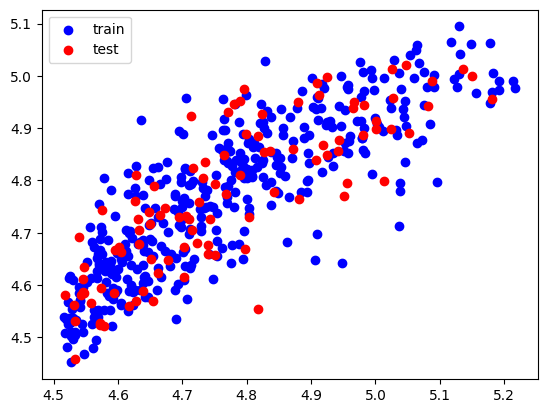

In [1042]:
y_pred_train = lr_model.predict(X_train_transformed)
y_pred_test = lr_model.predict(test_tr)
print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))
print('Error Train-Set : ', mean_absolute_error(y_train, y_pred_train))
print('Error Test-Set  : ', mean_absolute_error(y_test, y_pred_test))

plt.scatter(y_train, y_pred_train, color='blue', label='train') 
plt.scatter(y_test, y_pred_test, color='red', label='test') 
plt.legend()
plt.show()
 

# Hyperparameter Tuning

### RANDOM SEARCH

These are the hyperparameters that we will be tuning using `RandomizedSearchCV`

In [1043]:
param = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
    'n_jobs': [-1, 1, 2]
}


`RandomizedSearchCV` object that will be used to search over hyperparameters for a `LinearRegression model`. The hyperparameters to search over are specified in the param dictionary, which includes options for `fit_intercept, copy_X, positive, and n_jobs.`

In [1044]:
lr_random_search = RandomizedSearchCV(estimator=lr_model, 
                                      param_distributions=param, 
                                      n_iter=50, 
                                      cv=5, 
                                      n_jobs=-1)

In [1045]:
lr_random_search.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [-1, 1, 2],
                                        'positive': [True, False]})

The result of performed a `RandomizedSearchCV` with some hyperparameters for Linear Regression. However, `we did not find any improvement` in the model's performance, which suggests that the default hyperparameters of Linear Regression were already optimal for this dataset.

r2score train =  0.7076271347515374
r2score test =  0.6732488065124997
Error Train-Set :  0.07194424921400483
Error Test-Set  :  0.07920279961127824


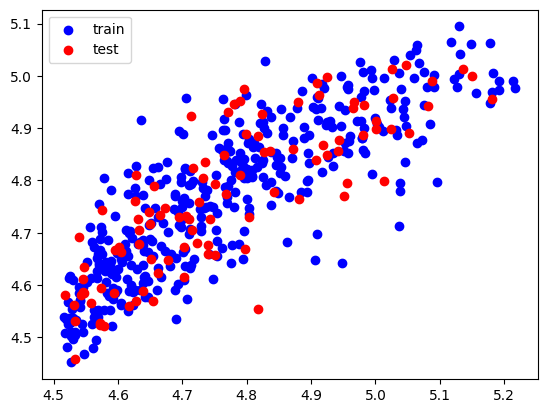

In [1046]:
y_pred_train_rfc = lr_random_search.predict(X_train_transformed)
y_pred_test_rfc = lr_random_search.predict(test_tr)
print('r2score train = ', r2_score(y_train, y_pred_train_rfc))
print('r2score test = ', r2_score(y_test, y_pred_test_rfc))
print('Error Train-Set : ', mean_absolute_error(y_train, y_pred_train_rfc))
print('Error Test-Set  : ', mean_absolute_error(y_test, y_pred_test_rfc))

plt.scatter(y_train, y_pred_train_rfc, color='blue', label='train') 
plt.scatter(y_test, y_pred_test_rfc, color='red', label='test') 
plt.legend()
plt.show()

### GRID SEARCH

`Grid search is a technique used for hyperparameter tuning in machine learning`. In this process, we create a grid of all the possible combinations of hyperparameters we want to tune, and then evaluate each combination using cross-validation. In our case, we created a parameter

In [1059]:
param_grid = {'fit_intercept': [True, False],
              'copy_X': [True],
              'n_jobs': [-1]}

In [1060]:
lr_grid_search = GridSearchCV(estimator=lr_model, 
                              param_grid=param_grid,
                              cv=5, 
                              scoring='neg_mean_squared_error')


In [1061]:
lr_grid_search.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True], 'fit_intercept': [True, False],
                         'n_jobs': [-1]},
             scoring='neg_mean_squared_error')

The result of performed a GridSearchCV with some `hyperparameters for Linear Regression`. However, `we did not find any improvement in the model's performance,` which suggests that the default hyperparameters of Linear Regression were already optimal for this dataset.

r2score train =  0.7076271347515374
r2score test =  0.6732488065124997
Error Train-Set :  0.07194424921400483
Error Test-Set  :  0.07920279961127824


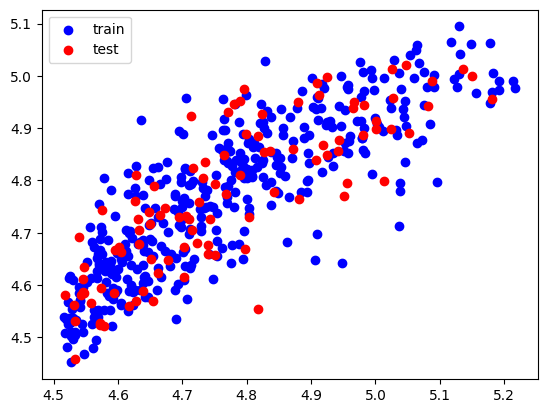

In [1062]:
y_pred_train_gs = lr_grid_search.predict(X_train_transformed)
y_pred_test_gs = lr_grid_search.predict(test_tr)
print('r2score train = ', r2_score(y_train, y_pred_train_gs))
print('r2score test = ', r2_score(y_test, y_pred_test_gs))
print('Error Train-Set : ', mean_absolute_error(y_train, y_pred_train_gs))
print('Error Test-Set  : ', mean_absolute_error(y_test, y_pred_test_gs))

plt.scatter(y_train, y_pred_train_gs, color='blue', label='train') 
plt.scatter(y_test, y_pred_test_gs, color='red', label='test') 
plt.legend()
plt.show()

# COMBINE MODEL WITH PIPELINE

In [1063]:
all_process = Pipeline([
    ("preprocess", preprocessor),
    ("classification", lr_random_search)
])

all_process.fit(x_train, y_train)
hasil = all_process.predict(x_test)

In [1064]:
all_process

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('encoder',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['sample_type']),
                                                 ('encoder2',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['v1', 'v2', 'v3', 'v4', 'v5',
                                                   'v6', 'v7', 'v8'])])),
                ('classification',
                 RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                                    n_iter=50, n_jobs=-1,
                                    param_distributions={'copy_X': [True,
                                                                    False],
                                                         'fit_intercept': [True,
                                                                           False],
                                                         'n_jobs': [-1, 1, 2],
                                                         'positive': [True,
                                                                      False]}))])

In [1065]:
hasil = all_process.predict(x_test)
print('r2score test = ', r2_score(y_test, hasil))

r2score test =  0.7053409677880748


# OVERALL CONCLUSION

Based on the analysis we have conducted, we found a strong correlation between the target variable and the features `v1-v8` and the `sample_type` feature, which indicates that the nutritional content of plants is related to the lab from which the data is collected. We also conducted a phi-k correlation analysis to identify the strength of the correlation between the target variable and the features. The results showed that the features `v1-v8 and sample_type` have a strong correlation with the target variable. 

Based on the analysis we performed, the best model for predicting the price of the house is the `linear regression` model. The model achieved an R2 score of `0.707` on the training set and `0.673` on the test set, indicating that it can explain `70.7%` of the variance in the training set and `67.3%` of the variance in the test set.

We also performed a `RandomizedSearchCV and GridSearchCV` to tune the hyperparameters of the linear regression model. However, both methods `did not result in a better model than the original one`. Therefore, we recommend using the default hyperparameters for the linear regression model.

Both RandomizedSearchCV and GridSearchCV were used to tune the hyperparameters of the Linear Regression model. However, the RandomizedSearchCV was applied first with a larger search space, and then the GridSearchCV was applied with a smaller search space around the best parameters found by RandomizedSearchCV. However, the performance of the tuned models did not improve compared to the original model,` which suggests that Linear Regression might not be the best model for this dataset or that the dataset might need more feature engineering to improve the model performance.`

`It is important to note that the analysis was based on the assumption that the data provided was manipulated. If the data is not manipulated, the results and conclusions we drew may not be accurate or reliable.`

# SAVE MODEL

In [1069]:
with open('all_process', 'wb') as file_1:
  joblib.dump(all_process, file_1)